<a href="https://colab.research.google.com/github/aminghafari1/lcaging-fmri/blob/main/lcaging_scan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np


Mounted at /content/gdrive


In [2]:
import scipy.io as sio
runs=["run1","run2","run3","run4","run5"]
print(runs[0])

run1


In [3]:
import glob
def substring_after(s,delim):
  return s.partition(delim)[2]
def substring_before(s,delim):
  return s.partition(delim)[0]

In [5]:
from scipy.stats import zscore

In [17]:
## When you need to change the subject index, sometimes it is associated with changing the session index as well. Check the data each time. 
## For example from BAP103 to BAP 102, because the visual data were stored in the third session, we needed to change the adress in four parts.
## namely in two parts we changed the BAP index from 103 to 102, and two parts from ses 2 to ses 3.
for run_index in range(len(runs)):
  file_directory=glob.glob('/content/gdrive/Shareddrives/LC-Aging/'\
  'Older Adult - MRI Study/Data Collection/BAP/BAP data/'\
  'sub-BAP001/ses-3/InsideScanner/'\
  'subjectBAP001_Voddball_session3_'\
  '%s' \
  '*.mat' %(runs[run_index]))
  if "eyetrack" in file_directory[0]:
    file_directory[0]=file_directory[1]
  file_directory=file_directory[0]
  current_run=sio.loadmat(file_directory)
  isoddball=current_run['isoddball']
  iscorr=current_run['iscorr']
  trial_offset=current_run['trial_offset']
  reaction_time=current_run['Resp1EndTimeP_SBP']-current_run['Resp1StartTimeP']
  nan_indices=np.where(np.isnan(iscorr)==True)
  nan_indices=nan_indices[1]
  reaction_time=reaction_time[~np.isnan(reaction_time)]
  log_reaction_time=np.log(reaction_time)
  zscore_reaction_time=zscore(log_reaction_time)
  RT_mean=np.mean(log_reaction_time)
  RT_std=np.std(log_reaction_time)
  iscorr_corrected=iscorr[~np.isnan(iscorr)]
  trial_offset_corrected=trial_offset[~np.isnan(iscorr)]
  isoddball_corrected=isoddball[~np.isnan(iscorr)]
  print('The shape for the offset_trial_corrected in run %d' %(run_index), 'is:',np.shape(trial_offset_corrected), 'The shape for the reaction time is:' ,np.shape(reaction_time))
  offsets_no_repeat_sorted=np.sort(np.unique(trial_offset))
  accuracy=np.zeros((np.size(offsets_no_repeat_sorted)))
  reaction=np.zeros((np.size(offsets_no_repeat_sorted)))
  print(np.shape(accuracy))
  if run_index==0:
    accuracies=np.zeros((np.size(accuracy),np.size(runs)))
    reactions=np.zeros((np.size(reaction),np.size(runs)))
  for i in range(len(offsets_no_repeat_sorted)):
    corrects=0
    total_time_to_react=0
    for j in range(len(iscorr_corrected)):
      if trial_offset_corrected[j]==offsets_no_repeat_sorted[i]:
        if iscorr_corrected[j]==1:
           corrects=corrects+1
        if (log_reaction_time[i]<RT_mean+3*RT_std or log_reaction_time[i]>RT_mean-3*RT_std):
           total_time_to_react=total_time_to_react+zscore_reaction_time[j]
        else:
          print("The trial %s of the run %s was an outlier" %(i,run_index))
    accuracy[i]=corrects/np.count_nonzero(trial_offset_corrected==offsets_no_repeat_sorted[i])
    reaction[i]=total_time_to_react/np.count_nonzero(trial_offset_corrected==offsets_no_repeat_sorted[i])
  accuracies[run_index,:]=accuracy
  reactions[run_index, :]=reaction





The shape for the offset_trial_corrected in run 0 is: (30,) The shape for the reaction time is: (30,)
(5,)
The shape for the offset_trial_corrected in run 1 is: (30,) The shape for the reaction time is: (30,)
(5,)
The shape for the offset_trial_corrected in run 2 is: (30,) The shape for the reaction time is: (30,)
(5,)
The shape for the offset_trial_corrected in run 3 is: (30,) The shape for the reaction time is: (30,)
(5,)
The shape for the offset_trial_corrected in run 4 is: (30,) The shape for the reaction time is: (30,)
(5,)


In [7]:
print(reactions)

[[ 0.29502318  0.08150655  0.23015782  0.07913743 -0.68582499]
 [ 0.09346563 -0.09303475  0.21843556  0.42585615 -0.64472258]
 [ 0.33803916  0.19567607  0.57499537  0.05936477 -1.16807537]
 [-0.5272074  -0.16976171  1.26995047  0.10038219 -0.67336355]
 [ 0.08171213  0.41640672  0.36559108  0.0896844  -0.95339433]]


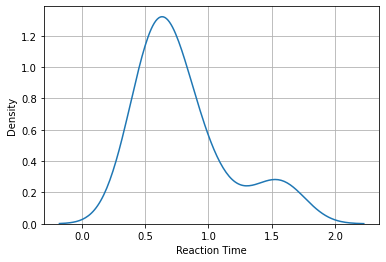

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(reaction_time)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
log_reaction_time
RT_mean=np.mean(log_reaction_time)
RT_std=np.std(log_reaction_time)
for i in range(len(log_reaction_time)):
  if log_reaction_time[i]>RT_mean+3*RT_std or log_reaction_time[i]<RT_mean-3*RT_std:
    print("The %d index is an outlier" %(i))



In [12]:

temp=substring_after(file_directory,"sub-")
subject_index=substring_before(temp,"/ses")
print(subject_index)

BAP001


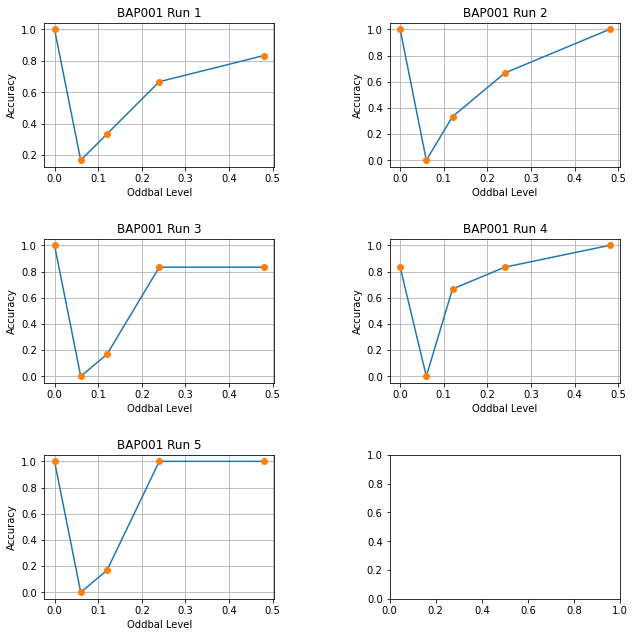

In [13]:
import matplotlib.pyplot as plt
num_rows=accuracies.shape[0]
fig ,axes=plt.subplots(nrows=(num_rows//2)+1, ncols=2, figsize=(10,10))

for i, ax in enumerate(axes.ravel()):
  if i<num_rows:
    ax.plot(offsets_no_repeat_sorted,accuracies[i])
    ax.plot(offsets_no_repeat_sorted,accuracies[i], 'o', label='data points')
    ax.set_title(f"%s Run {i+1}" %(subject_index))
    ax.set_xlabel("Oddbal Level")
    ax.set_ylabel("Accuracy")
    ax.grid(True)
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9, top=0.9, bottom=0.1)
import os.path
from os import path
if path.exists('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index)) == False:
  os.mkdir('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index))
save_directory=('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index))
plt.savefig(f"{save_directory}/accuracy.png")


BAP001


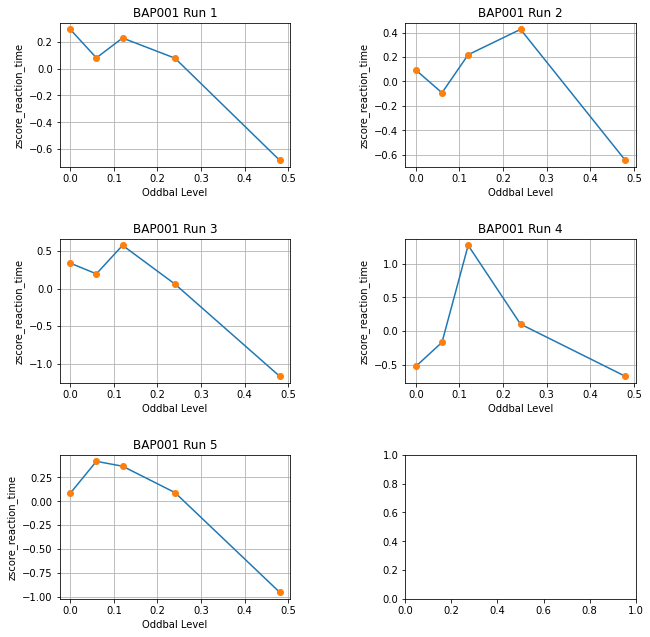

In [14]:
num_rows=5
fig ,axes=plt.subplots(nrows=(num_rows//2)+1, ncols=2, figsize=(10,10))
for i, ax in enumerate(axes.ravel()):

  if i<num_rows:
    ax.plot(offsets_no_repeat_sorted,reactions[i])
    ax.plot(offsets_no_repeat_sorted,reactions[i], 'o', label='data points')
    ax.set_title(f"%s Run {i+1}" %(subject_index))
    ax.set_xlabel("Oddbal Level")
    ax.set_ylabel("zscore_reaction_time")
    ax.grid(True)
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9, top=0.9, bottom=0.1)
import os.path
from os import path
if path.exists('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index)) == False:
  os.mkdir('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index))
save_directory=('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index))
plt.savefig(f"{save_directory}/reaction_time_zscore.png")

In [42]:
reactions

array([[-0.19218954,  0.38227731,  0.56003109, -0.11889436, -0.63122451],
       [-0.43487716,  0.15219054,  0.84697866,  0.1760951 , -0.74038714],
       [ 0.04808909, -0.06597463,  0.99368044,  0.11161997, -1.08741487],
       [-0.39345909,  0.29048255,  0.61201131, -0.12454034, -0.38449443],
       [ 0.14385372,  0.28343619,  0.27550931,  0.14413679, -0.84693601]])

In [15]:
import pandas as pd
pd.DataFrame(accuracies).to_csv("%s/accuracy_results.csv" %(save_directory))
pd.DataFrame(reactions).to_csv("%s/reaction_zscore_results.csv" %(save_directory))